# Step 1:importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import pickle

In [2]:
# Setup for plots
%matplotlib inline
sns.set_theme(style="whitegrid")

In [3]:
# Load your uploaded file
df = pd.read_csv('material.csv')
print(f"Dataset Loaded: {df.shape[0]} materials available.")
df.head()

Dataset Loaded: 1552 materials available.


,Material,Su,Sy,E,G,mu,Ro,Use
0,ANSI Steel SAE 1015 as-rolled,421,314,207000,79000,0.3,7860,True
1,ANSI Steel SAE 1015 normalized,424,324,207000,79000,0.3,7860,True
2,ANSI Steel SAE 1015 annealed,386,284,207000,79000,0.3,7860,True
3,ANSI Steel SAE 1020 as-rolled,448,331,207000,79000,0.3,7860,True
4,ANSI Steel SAE 1020 normalized,441,346,207000,79000,0.3,7860,True


# step 2:Data Visualization

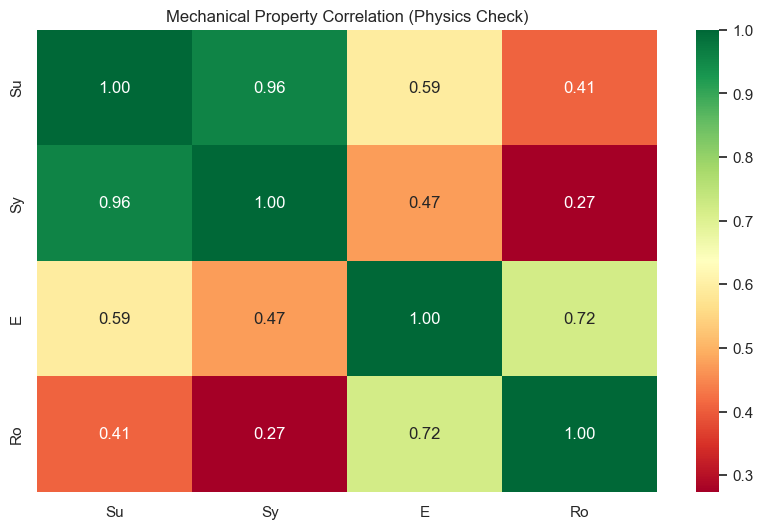

In [4]:
# 1. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = df[['Su', 'Sy', 'E', 'Ro']].corr()
sns.heatmap(correlation, annot=True, cmap='RdYlGn', fmt=".2f")
plt.title('Mechanical Property Correlation (Physics Check)')
plt.show()

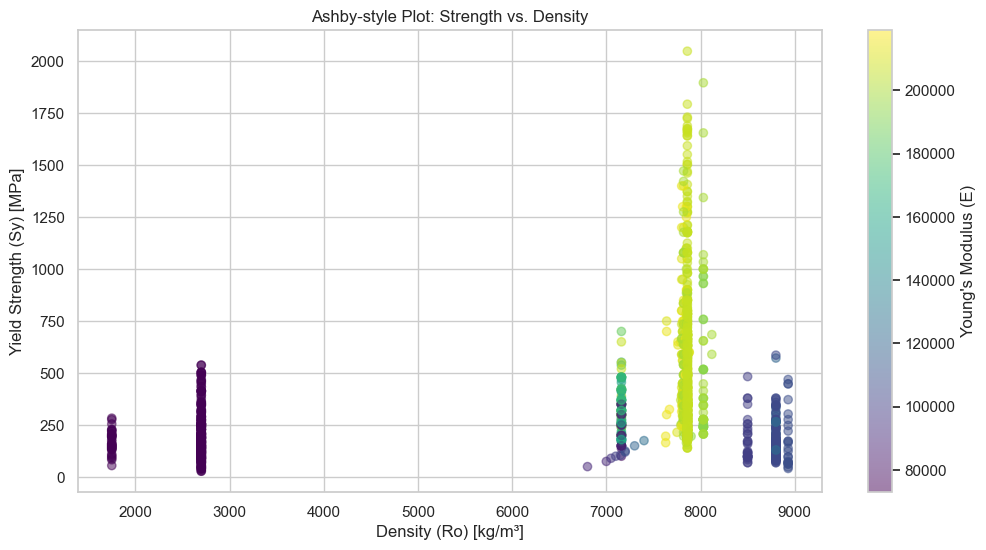

In [5]:
# 2. Strength vs Density Scatter Plot
plt.figure(figsize=(12, 6))
plt.scatter(df['Ro'], df['Sy'], c=df['E'], cmap='viridis', alpha=0.5)
plt.colorbar(label="Young's Modulus (E)")
plt.xlabel('Density (Ro) [kg/m³]')
plt.ylabel('Yield Strength (Sy) [MPa]')
plt.title('Ashby-style Plot: Strength vs. Density')
plt.show()

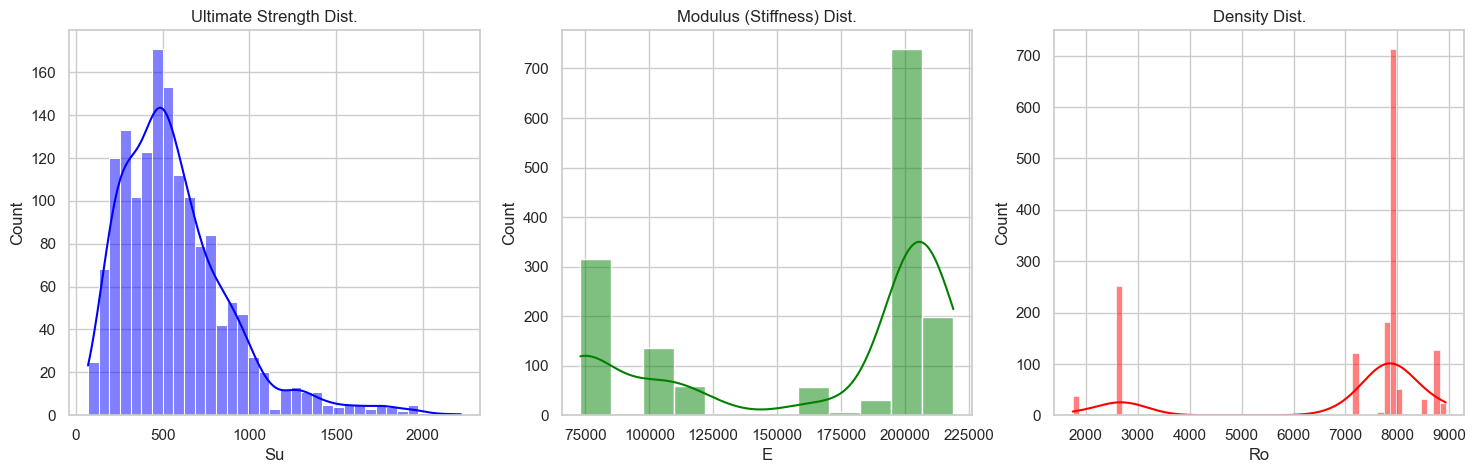

In [6]:
# 3. Distribution of Key Properties
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Su'], kde=True, ax=axes[0], color='blue').set_title('Ultimate Strength Dist.')
sns.histplot(df['E'], kde=True, ax=axes[1], color='green').set_title('Modulus (Stiffness) Dist.')
sns.histplot(df['Ro'], kde=True, ax=axes[2], color='red').set_title('Density Dist.')
plt.show()

# Step 3:ML Engine

In [7]:
# Select features for the ML model
features = ['Su', 'Sy', 'E', 'Ro']
X = df[features]

In [8]:
# Scaling is mandatory for KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# Building the KNN model (Using 5 neighbors)
model = NearestNeighbors(n_neighbors=5, metric='euclidean')
model.fit(X_scaled)

print("Machine Learning Engine Trained Successfully.")

Machine Learning Engine Trained Successfully.


# Step 4:Recommendation tool

In [10]:
def get_recommendation_with_safety(su, sy, e, ro, fos=1.2):
    # Standard recommendation
    user_input_scaled = scaler.transform([[su, sy, e, ro]])
    dist, ind = model.kneighbors(user_input_scaled)
    recs = df.iloc[ind[0]].copy()
    
    # Add a check: Is the suggested material actually strong enough?
    recs['Safe'] = recs['Sy'] >= (sy * fos)
    return recs

In [11]:
# Test it
get_recommendation(500, 350, 200000, 7800)

NameError: name 'get_recommendation' is not defined

# Step 5:Visualising The Result

In [ ]:
# Cell: Combined Visualization
my_recs = get_recommendation(500, 350, 200000, 7800)

plt.figure(figsize=(10, 6))
# 1. Background
plt.scatter(df['Ro'], df['Sy'], c='lightgrey', alpha=0.3, label='All Materials')
# 2. Highlights
plt.scatter(my_recs['Ro'], my_recs['Sy'], c='red', s=100, edgecolors='black', label='Recommended')

plt.xlabel('Density (Ro) [kg/m³]')
plt.ylabel('Yield Strength (Sy) [MPa]')
plt.title('Suggested Materials in Design Space')
plt.legend()
plt.show()

In [ ]:
with open('material_model.pkl', 'wb') as f:
    pickle.dump((model, scaler, df), f)